## Data Analysis

In [1]:
import os
import dotenv

dotenv.load_dotenv()
DB_HOST = os.getenv('GP_DB_HOST')
DB_PORT = os.getenv('GP_DB_PORT')
DB_USER = os.getenv('GP_DB_USER')
DB_PASS = os.getenv('GP_DB_PASS')
DB_NAME = os.getenv('GP_DB_NAME')

# DB_HOST = "groupseven.c7uho3baxiu8.us-west-2.rds.amazonaws.com"
# DB_NAME = "groupseven"
# DB_USER = "seven"
# DB_PASS = "BAIT580SQL"
# DB_PORT = "5432"

conString = {'host':DB_HOST,
             'user':DB_USER,
             'dbname':DB_NAME,
             'password':DB_PASS,
             'port':DB_PORT}

# Data manipulation
import pandas as pd
import klib

import numpy as np
import psycopg2

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import altair as alt
import matplotlib.pyplot as plt
alt.data_transformers.disable_max_rows()  # disable error for big datasets

DataTransformerRegistry.enable('default')

Establishing Connection

In [2]:
conn = psycopg2.connect(**conString)
cur = conn.cursor()

Assigning Selected Countries

In [3]:
selected_countries = ['SGP','ESP','CHL','QAT','NZL','CHN','BGR','MEX','BRA','JOR','ZAF','SLV','IND','UKR','KEN','RWA','MLI','SEN', 'NPL','UZB']

selected_countries_str = "'SGP','ESP','CHL','QAT','NZL','CHN','BGR','MEX','BRA','JOR','ZAF','SLV','IND','UKR','KEN','RWA','MLI','SEN', 'NPL','UZB'"

Getting the data from 2009 to 2018

In [4]:
query = f'''SELECT ct.country_name, ei.country_code, ei.year, ei.val_qual_ed, hc.edu_pcnt_bud, hc.edu_pcnt_gdp, hc.hdi, hc.gdp_us, hc.gdp_growth,income_grp, region
FROM edx.education_indicators AS ei INNER JOIN edx.human_capital AS hc ON ei.year = hc.year AND ei.country_code = hc.country_code
	INNER JOIN edx.country AS ct ON ct.country_code = ei.country_code
WHERE ei.year BETWEEN 2009 AND 2018 AND ct.country_code in ({selected_countries_str}) 
ORDER BY ei.year DESC, ei.country_code'''

cur.execute(query= query)
edu_indicators = pd.DataFrame(cur.fetchall())
edu_indicators.columns = ['country_name', 'country_code' ,'year', 'val_qual_ed','edu_pcnt_gdp', 'edu_pcnt_bud','hdi','gdp_growth','gdp_us','income_grp','region']

Looking at the data

In [5]:
edu_indicators.head()

,country_name,country_code,year,val_qual_ed,edu_pcnt_gdp,edu_pcnt_bud,hdi,gdp_growth,gdp_us,income_grp,region
0,Republic of Bulgaria,BGR,2018,NaN,NaN,NaN,0.813,6.636342e+10,2.684576,Upper middle income,Europe & Central Asia
1,Federative Republic of Brazil,BRA,2018,NaN,16.148359,6.08851,0.762,1.916930e+12,1.783667,Upper middle income,Latin America & Caribbean
2,Republic of Chile,CHL,2018,NaN,21.379530,5.43317,0.849,2.975720e+11,3.713859,High income,Latin America & Caribbean
3,People's Republic of China,CHN,2018,NaN,11.450690,3.54249,0.755,1.389480e+13,6.749774,Upper middle income,East Asia & Pacific
4,Kingdom of Spain,ESP,2018,NaN,10.030330,4.17816,0.905,1.420300e+12,2.288786,High income,Europe & Central Asia


What does the data has

In [6]:
edu_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  200 non-null    object 
 1   country_code  200 non-null    object 
 2   year          200 non-null    int64  
 3   val_qual_ed   170 non-null    float64
 4   edu_pcnt_gdp  173 non-null    float64
 5   edu_pcnt_bud  181 non-null    float64
 6   hdi           200 non-null    float64
 7   gdp_growth    200 non-null    float64
 8   gdp_us        200 non-null    float64
 9   income_grp    200 non-null    object 
 10  region        200 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 17.3+ KB


Visualize missing data in our overall dataset

GridSpec(6, 6)

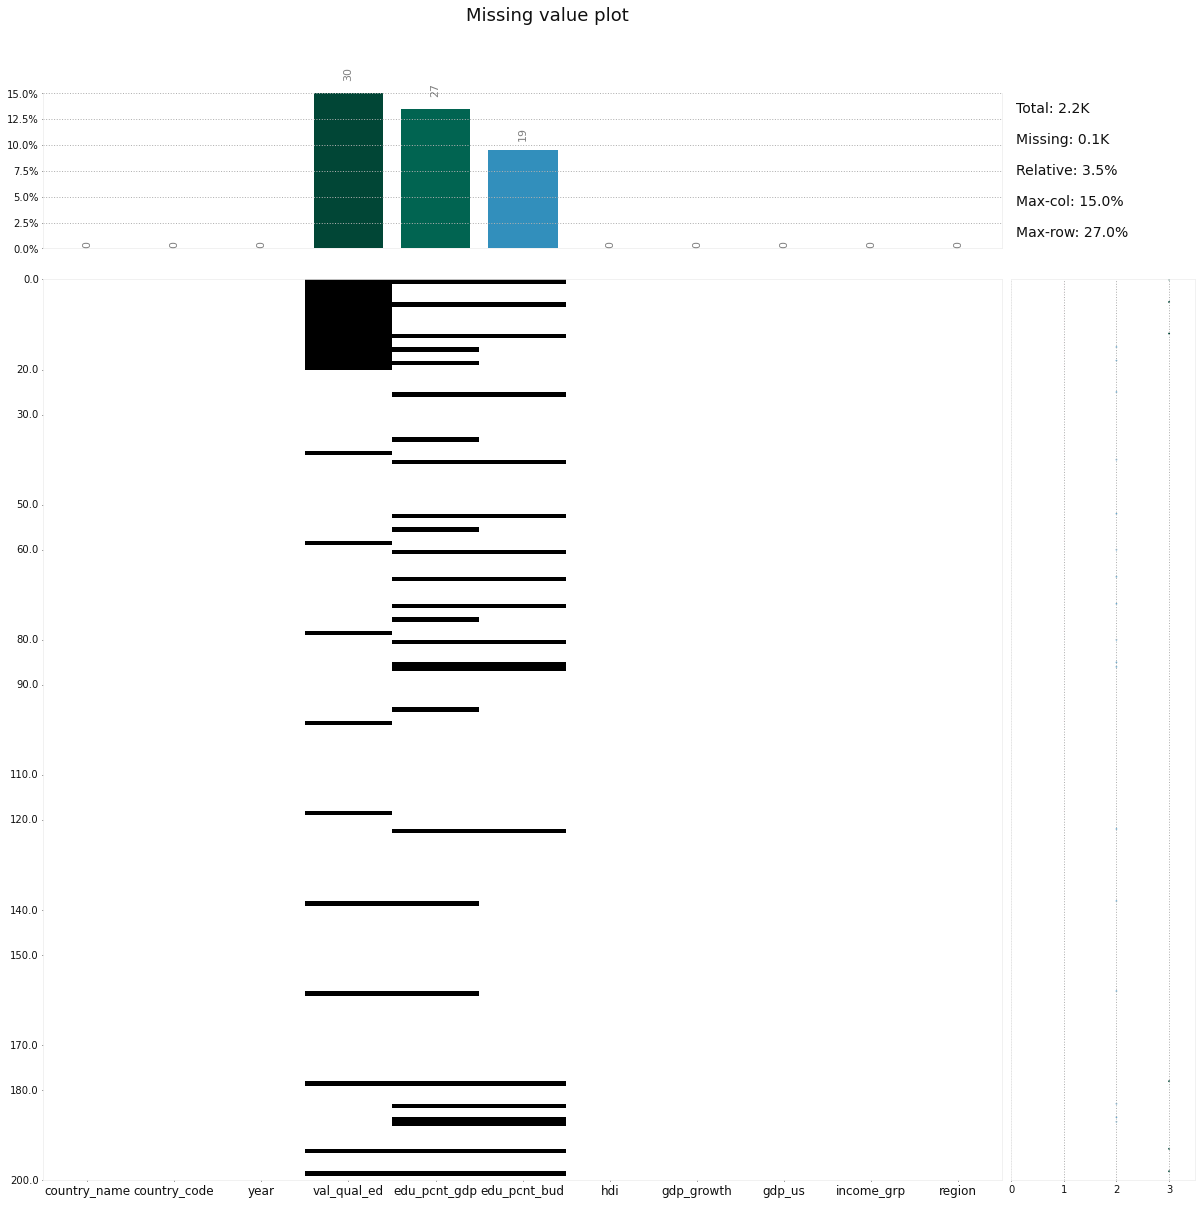

In [7]:
klib.missingval_plot(edu_indicators)

Build the cross sectional slice that we are interested in

In [8]:
edu_indicators_2017 = edu_indicators[edu_indicators['year']==2017]

Visualize the missing data in 2017 dataset

GridSpec(6, 6)

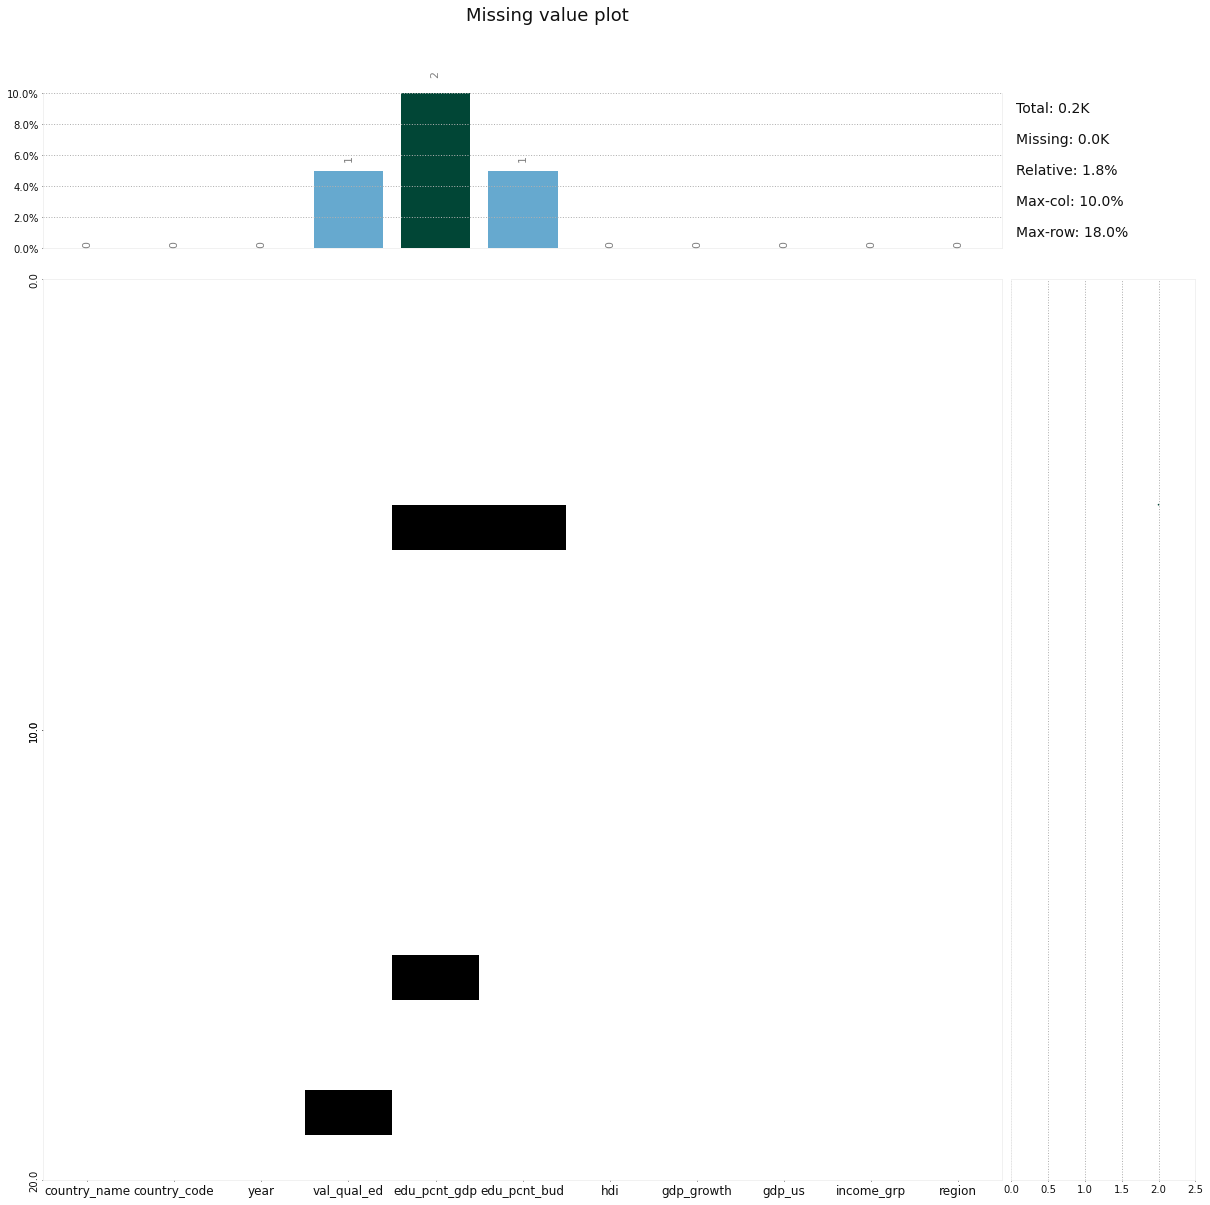

In [9]:
klib.missingval_plot(edu_indicators_2017)

### HERE WE SHOULD IMPUTE

### Visualize our selected Countries

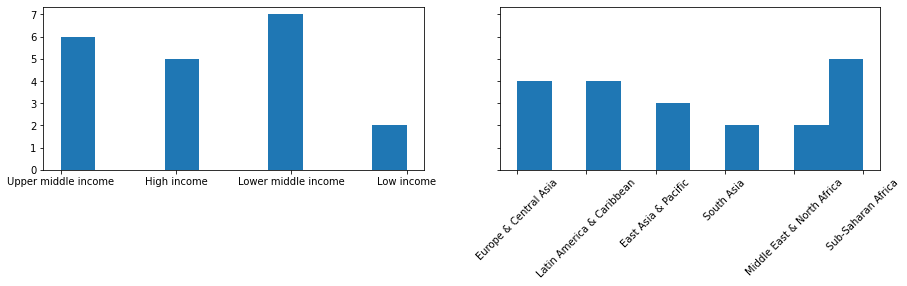

In [10]:
fig, ax = plt.subplots(1,2, figsize = (15,3), sharex=False, sharey=True)
ax[0].hist(edu_indicators_2017['income_grp'])
ax[1].hist(edu_indicators_2017['region'])
plt.xticks(rotation=45)
plt.show()


In [11]:
import plotly.express as px
import pandas as pd

fig = px.choropleth(locations=edu_indicators_2017['country_code'], 
                    locationmode="ISO-3",
                    color=edu_indicators_2017['income_grp'],
                    color_discrete_map={'High income':'Blue',
                                        'Upper middle income':'Green',
                                        'Lower middle income':'Orange',
                                        'Low income':'Red'},
                    scope="world"
                   )
fig.show()

In [12]:
import plotly.express as px
import pandas as pd
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline

#Visualize the countries selected on a map .. color the countries by income group.. Upon hovering it should show the HDI, GDP, GDP_Growth, Qual_Ed
clr={'1':'red', '2':'Yellow','3':'Green','4':'Blue'}
country_code = ['CHL','EGY','USA','CAN']
gdp_us = ['1','2','2','4']
country_name = ['Chile','Egypt','United States','Canada']

dt = dict(type='choropleth', 
            locations = edu_indicators['country_code'], 
            #z = edu_indicators.income_grp.astype('category').codes,
            z = edu_indicators[['income_grp']].apply(lambda col:pd.Categorical(col).codes).income_grp,
            text = edu_indicators['country_name'])

layout = dict(title = 'VIZ', 
              geo = dict(showframe = False, 
                       projection = {'type':'robinson'}, 
                       showlakes = False,
                       lakecolor = 'rgb(0,191,255)'))
x = pg.Figure(data = [dt], layout = layout)
po.iplot(x)


### Bivariate data analysis

Text(0.5, 1.05, 'Quality of Education System')

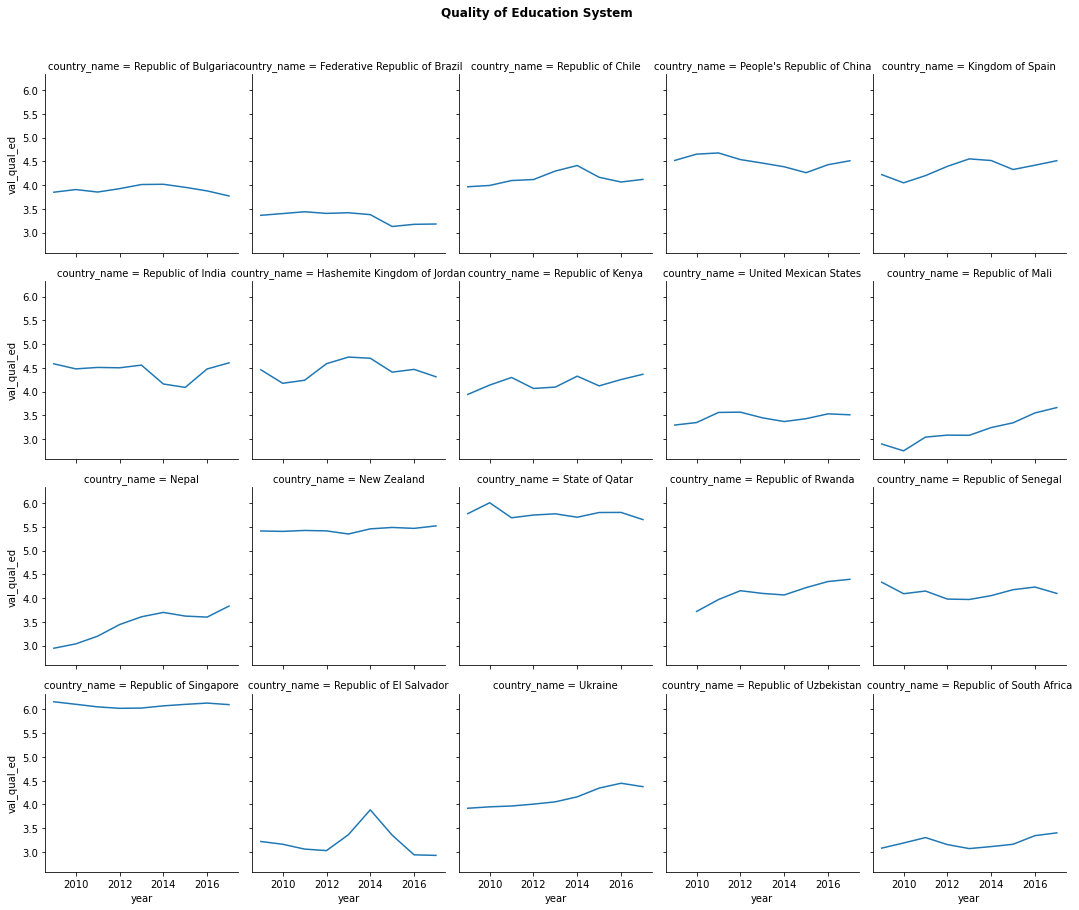

In [13]:
import seaborn as sns
g = sns.FacetGrid(edu_indicators, col='country_name', palette='Set1', col_wrap=5)
g.map_dataframe(sns.lineplot,'year', 'val_qual_ed')
g.fig.suptitle('Quality of Education System', y=1.05, fontweight='bold')

/var/folders/g2/rxrv5lvj0gzbd4fs1kyn5zgm0000gn/T/ipykernel_23975/2919615426.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



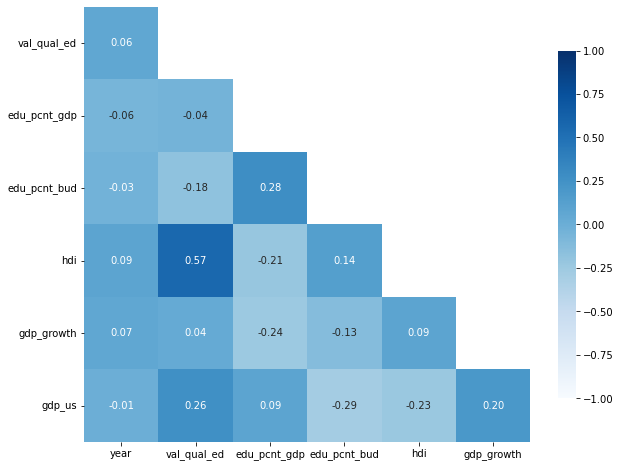

In [14]:
df_corr = edu_indicators.corr()

fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

### Closing Connection

In [15]:
conn.close()